In [1]:
# Import 
import os
import time
import json
import datetime
import numpy as np
import pandas as pd

from IPython.display import display

from pathlib import Path
from tyssue import config
from tyssue import Sheet#, SheetGeometry as geom
from tyssue.geometry.sheet_geometry import ClosedSheetGeometry as geom
from tyssue.io import hdf5
from tyssue.io.hdf5 import load_datasets
from tyssue.dynamics import SheetModel as basemodel
from tyssue.dynamics.apoptosis_model import SheetApoptosisModel as model
from tyssue.solvers.sheet_vertex_solver import Solver as solver
from tyssue.draw import sheet_view
from tyssue.draw.plt_draw import quick_edge_draw
from tyssue.draw.ipv_draw import sheet_view as ipv_draw 

from tyssue.behaviors.event_manager import EventManager
from tyssue.behaviors.sheet.apoptosis_events import apoptosis

import matplotlib.pyplot as plt
%matplotlib inline

try:
    import seaborn as sns
except ImportError:
    print('Seaborn not found')
import ipyvolume as ipv
ipv.clear()

In [6]:
SIM_DIR = Path('/home/admin-suz/Documents/Simulations/test')
dirname = SIM_DIR/'1.1_constriction_0_radialtension'
from tyssue.draw import sheet_view
from tyssue.core.history import _retrieve



In [8]:
file_list = os.listdir(dirname)

d_area={}
d_contractility={}
for f in file_list:
    print(f)
    area=[]
    contractility=[]
    with pd.HDFStore(os.path.join(dirname, f), 'r') as file : 
        dt = f.split('_')[1]
                  
        if float(dt)>0.1:
            for t in np.linspace(0, 10, 10/float(dt)+1):
                sheet_datasets = {}
                for element in ['vert', 'face', 'edge']:
                    hist = file["{}_df".format(element)]
                    df = _retrieve(hist, t)
                    sheet_datasets[element] = df


                specs = config.geometry.cylindrical_sheet()
                sheet = Sheet('ellipse', sheet_datasets, specs)

                area.append(sheet.face_df.loc[72, 'area'])
                contractility.append(sheet.face_df.loc[72, 'contractility'])

        else :
            for t in np.linspace(0, 10, 10/float(0.1)+1):
                sheet_datasets = {}
                for element in ['vert', 'face', 'edge']:
                    hist = file["{}_df".format(element)]
                    df = _retrieve(hist, t)
                    sheet_datasets[element] = df


                specs = config.geometry.cylindrical_sheet()
                sheet = Sheet('ellipse', sheet_datasets, specs)

                area.append(sheet.face_df.loc[72, 'area'])
                contractility.append(sheet.face_df.loc[72, 'contractility'])

    d_area[dt] = area
    d_contractility[dt]=contractility

out_0.1_dt.hf5


/home/admin-suz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


out_0.2_dt.hf5


/home/admin-suz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  del sys.path[0]


out_0.05_dt.hf5
out_0.01_dt.hf5
out_0.5_dt.hf5


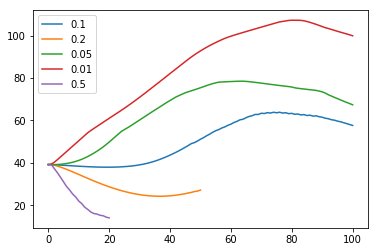

In [9]:
for key in d_area.keys():
    plt.plot(d_area[key],label=key)
plt.legend()

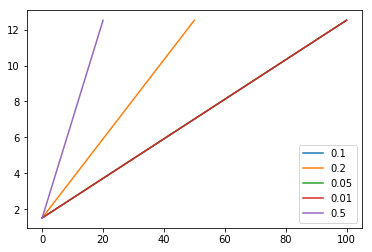

In [10]:
for key in d_area.keys():
    plt.plot(d_contractility[key],label=key)
plt.legend()

In [3]:
angle = pd.read_csv('angle.csv')

(array([ 5.,  5.,  3.,  9.,  7., 12.,  6., 20., 23., 10.]),
 array([ 40.99  ,  53.6613,  66.3326,  79.0039,  91.6752, 104.3465,
        117.0178, 129.6891, 142.3604, 155.0317, 167.703 ]),
 <a list of 10 Patch objects>)

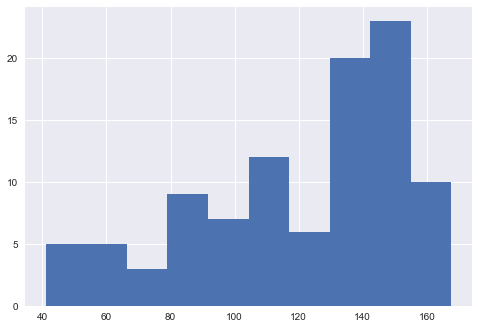

In [48]:
plt.hist(angle.Angle)

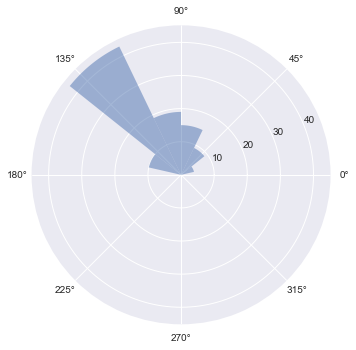

In [45]:
import numpy as np
import matplotlib.pyplot as plt

n_numbers = 100
bins_number = 14  # the [0, 360) interval will be subdivided into this
# number of equal bins
bins = np.linspace(0.0, 2 * np.pi, bins_number + 1)
angles = angle.Angle.values *np.pi/180
n, _, _ = plt.hist(angles, bins)

plt.clf()
width = 2 * np.pi / bins_number
ax = plt.subplot(1, 1, 1, projection='polar')
bars = ax.bar(bins[:bins_number], n, width=width, bottom=0.0)
for bar in bars:
    bar.set_alpha(0.5)
plt.show()